In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import scipy.special
from matplotlib import animation, rc
from IPython.display import HTML

In [286]:

plt.style.use('default')
c=1
L=1
N=500
deltat=0.001
deltax=L/N
x_0=0

In [287]:
def equation(option,x):
    if option==0:
        return np.sin(2*np.pi*x)
    if option==1:
        return np.sin(5*np.pi*x)
    if option==2:
        return np.sin(5*np.pi*x)
    
def finalright(x_0,c,deltat,deltax,N,option):
    xlist=np.arange(0,1,deltax)
    if option==0:
        #initial
        initialcondition_1=np.array([equation(option,steps) for steps in xlist])
    if option==1:
        initialcondition_1=np.array([equation(option,steps) for steps in xlist])
    if option==2:
        initialcondition_1=np.zeros(int(1/deltax))
        for index,i in enumerate (xlist):
            if 1/5 <i< 2/5:
                initialcondition_1[index]=equation(option,i)
        
    previousstep = initialcondition_1
    plt.plot(xlist,initialcondition_1)
    
    ##control the time step
    for t in np.arange(0,1+deltat,deltat):##control the time step
        initialcondition = np.zeros((int(N)))#store next condition #
        if t==0:
            initialcondition = initialcondition_1
            

        else:
            for i in range(len(initialcondition)):
                if i==0 or i==len(initialcondition)-1:
                    initialcondition[i]=0
                if 0<i<len(initialcondition)-1:
                    initialcondition[i]=2*initialcondition_1[i]-previousstep[i]+((c**2)*(deltat**2)/(deltax**2))*(initialcondition_1[i+1]+initialcondition_1[i-1]-2*initialcondition_1[i])
            previousstep=initialcondition_1
            initialcondition_1=initialcondition
            if  t==0.1  or t==0.2 or t==0.3 or t==0.4 or t==1:
                plt.plot(xlist,initialcondition_1,label='t='+str(t))
            else:
                continue
    plt.legend() 
    plt.xlabel('x',size=15)
    plt.ylabel('$\Psi$',size=15)
#     plt.savefig('different_sin_5_lim.jpg')


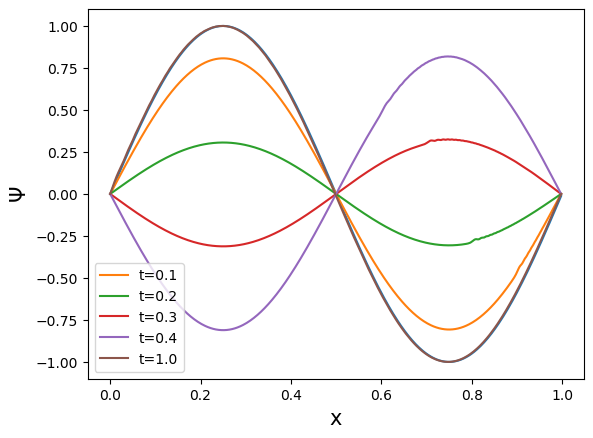

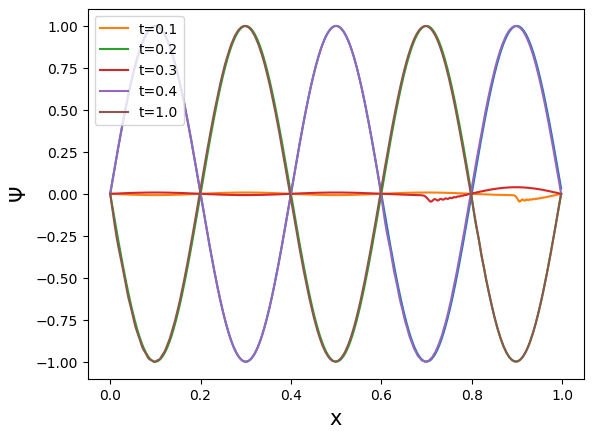

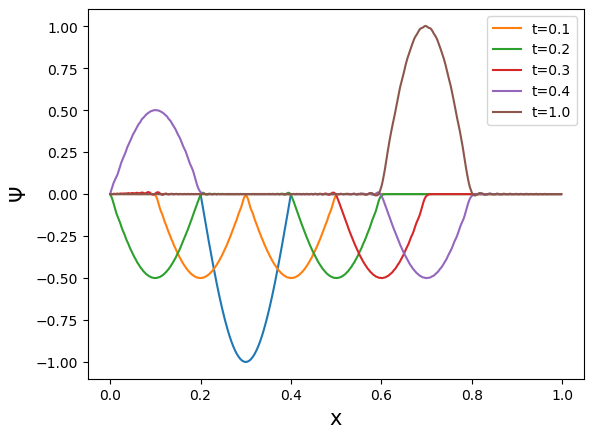

In [288]:
finalright(x_0,c,deltat,deltax,N,0)
plt.show()
finalright(x_0,c,deltat,deltax,N,1)
plt.show()
finalright(x_0,c,deltat,deltax,N,2)

# Animation

In [2]:
c=1
L=1
N=1000
deltat=0.001
deltax=L/N
tmax = 1 
x_0=0

def equation(option,x):
    if option==0:
        return np.sin(2*np.pi*x)
    if option==1:
        return np.sin(5*np.pi*x)
    if option==2:
        return np.sin(5*np.pi*x)
    
def finalright_an(x_0,c,deltat,deltax,N,option):
    xlist=np.arange(0,1,deltax)
    results = []
    if option==0:
        #initial
        initialcondition_1=np.array([equation(option,steps) for steps in xlist])
    if option==1:
        initialcondition_1=np.array([equation(option,steps) for steps in xlist])
    if option==2:
        initialcondition_1=np.zeros(int(1/deltax))
        for index,i in enumerate (xlist):
            if 1/5 <i< 2/5:
                initialcondition_1[index]=equation(option,i)
    
    previousstep = initialcondition_1
    results.append(initialcondition_1)
    #plt.plot(xlist,initialcondition_1)
    
    ##control the time step
    for t in np.arange(0,tmax,deltat):##control the time step
        initialcondition = np.zeros((int(N)))#store next condition #
        if t==0:
            for i in range(len(initialcondition)):
                if i==0 or i==len(initialcondition)-1:
                    initialcondition[i]=0
                if 0<i<len(initialcondition)-1:
                    initialcondition[i]=initialcondition_1[i]+((c**2)*(deltat**2)/(deltax**2))*(initialcondition_1[i+1]+initialcondition_1[i-1]-2*initialcondition_1[i])
            initialcondition_1=initialcondition
            results.append(initialcondition_1)
            #plt.plot(xlist,initialcondition_1)

        else:
            for i in range(len(initialcondition)):
                if i==0 or i==len(initialcondition)-1:
                    initialcondition[i]=0
                if 0<i<len(initialcondition)-1:
                    initialcondition[i]=2*initialcondition_1[i]-previousstep[i]+((c**2)*(deltat**2)/(deltax**2))*(initialcondition_1[i+1]+initialcondition_1[i-1]-2*initialcondition_1[i])
            previousstep=initialcondition_1
            initialcondition_1=initialcondition
            results.append(initialcondition_1)
            #plt.plot(xlist,initialcondition_1)
            
    return results

In [3]:
results1 = finalright_an(x_0,c,deltat,deltax,N,0)
results2 = finalright_an(x_0,c,deltat,deltax,N,1)
results3 = finalright_an(x_0,c,deltat,deltax,N,2)

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
xlist = np.arange(0,1,deltax)
tlist = np.arange(0,tmax,deltat)
tintervals = len(results1)

fig, ax = plt.subplots()

ax.set_xlim(( 0, xlist[-1]))
ax.set_ylim((-1.2, 1.2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate1(i):
    #sample = tsamples[i]
    x = xlist
    y = results1[i][:]
    line.set_data(x, y)
    return (line,)

def animate2(i):
    #sample = tsamples[i]
    x = xlist
    y = results2[i][:] #np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

def animate3(i):
    #sample = tsamples[i]
    x = xlist
    y = results3[i][:] #np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim1 = animation.FuncAnimation(fig, animate1, init_func=init,
                               frames=tintervals, interval=20, blit=True)

# call the animator. blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=tintervals, interval=20, blit=True)

# call the animator. blit=True means only re-draw the parts that have changed.
anim3 = animation.FuncAnimation(fig, animate3, init_func=init,
                               frames=tintervals, interval=20, blit=True)

plt.close()

In [5]:
HTML(anim1.to_html5_video())

In [6]:
HTML(anim2.to_html5_video())

In [7]:
HTML(anim3.to_html5_video())

# The Time Dependent Diffusion Equation

In [535]:
N = 50
D=1
deltat=2.5*10e-7
tend=0.001
c_ij=np.zeros([N,N])
c_ij[0]=1

In [17]:
#one time step:
def time_dependent(c_ij,tend,deltat,D,N):
    dy=1/N
    for h in np.arange(0,tend,deltat):
        c_iteration=np.zeros([N,N])
        c_iteration[0]=1
        c_iteration[len(c_ij[0])-1]=0
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                    
            #lefside
                if j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1]-4*c_ij[i,j])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1]-4*c_ij[i,j])


                elif  1 <=j <=(len(c_ij[0])-2) and 1 <= i <=(len(c_ij[0])-2):
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1]-4*c_ij[i,j]) 
        c_ij=c_iteration
    return c_ij


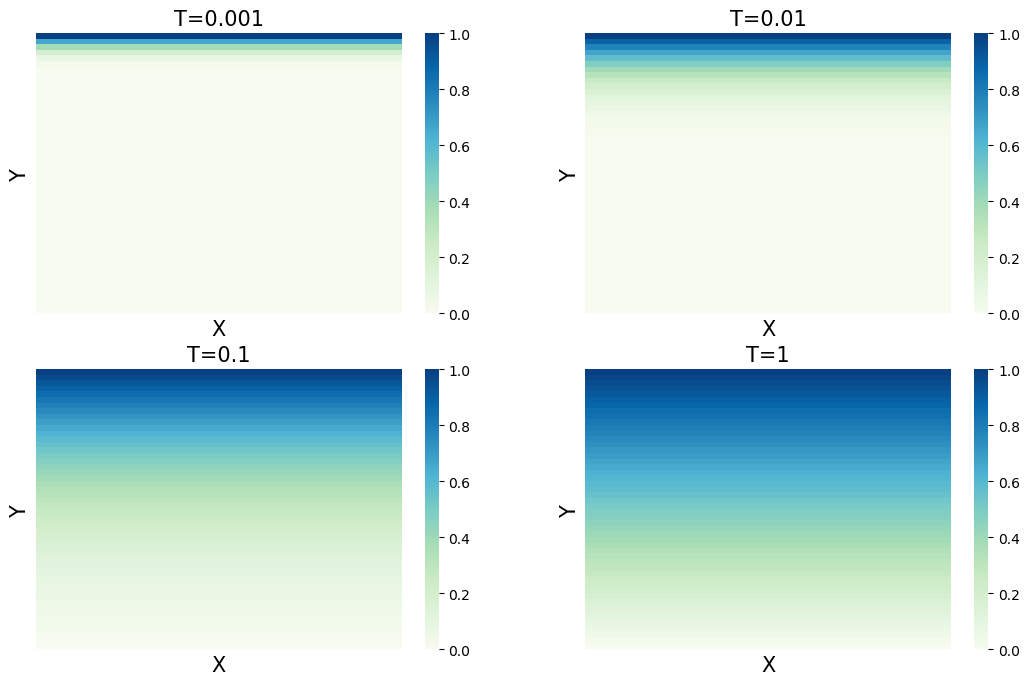

In [141]:
N = 50
D=1
deltat=0.0001
tend=0
c_ij=np.zeros([N,N])
c_ij[0]=1
tendlist=[0.001,0.01,0.1,1]
# sns.heatmap(time_dependent(c_ij,0.0,deltat,D,N),cmap="GnBu")
# plt.savefig('t==0.jpg',dpi=200)
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.heatmap(time_dependent(c_ij,0.001,deltat,D,N),cmap="GnBu")
plt.title('T=0.001',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,2)
sns.heatmap(time_dependent(c_ij,0.01,deltat,D,N),cmap="GnBu")
plt.title('T=0.01',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,3)
sns.heatmap(time_dependent(c_ij,0.1,deltat,D,N),cmap="GnBu")
plt.title('T=0.1',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,4)
sns.heatmap(time_dependent(c_ij,1,deltat,D,N),cmap="GnBu")
plt.title('T=1',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.savefig('tchange.jpg',dpi=200)

# Animation

In [8]:
N = 50
D=1
deltat=2.5*10e-7
tend=0.1
c_ij=np.zeros([N,N])
c_ij[0]=1

In [21]:
#one time step:
def time_dependent_an(c_ij,tend,deltat,D,N):
    
    time_dep_results = []
    
    dy=1/N
    for h in np.arange(0,tend,deltat):
        c_iteration=np.zeros([N,N])
        c_iteration[0]=1
        c_iteration[len(c_ij[0])-1]=0
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                
            #lefside
                if j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1]-4*c_ij[i,j])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1]-4*c_ij[i,j])


                elif  1 <=j <=(len(c_ij[0])-2) and 1 <= i <=(len(c_ij[0])-2):
                    c_iteration[i,j] = c_ij[i,j]+(deltat*D/(dy**2))*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1]-4*c_ij[i,j]) 
                
        c_ij=c_iteration
        time_dep_results.append(c_ij)
        
    return time_dep_results #cij


In [10]:
time_dep_results = time_dependent_an(c_ij,tend,deltat,D,N) 

In [11]:
def animate(results,Nsample):
    
    tsamples = [int(i) for i in np.linspace(0,len(results)-1,Nsample)]
    tintervals = len(tsamples)
    
    fig = plt.figure()
    image = plt.imshow(results[0][:][:],extent=[0,1,0,1],animated=True)
    plt.xticks((0,1))
    plt.yticks((0,1))
    cbar = plt.colorbar(image)
    #cbar.ax.set_ylabel('Concentration')
    
    def animate(i):
        sample = tsamples[i]
        
        image.set_array(results[sample][:][:])
        return image,
    
    time_anim = animation.FuncAnimation(fig, animate, frames=tintervals,interval=50, blit=True)
    
    return time_anim

Nsample = 50
time_anim = animate(time_dep_results,Nsample)
plt.close()

In [12]:
HTML(time_anim.to_html5_video())

# TIME INDEPENDET

# The Jacobi Iteration

In [183]:
yL = 1
N = 50
dy = yL/N
t=1
c_ij=np.zeros([N,N])
c_ij[0]=1


def jacobi(k,c_ij,maxnumber):
    for t in range(k):
        c_iteration=np.zeros([N,N])
        c_iteration[0]=1
        c_iteration[len(c_ij[0])-1]=0   
        max_number =0 
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
            #lefside
                if j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_iteration[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1])

                elif  1 <=j <=(len(c_ij[0])-2) and 1 <= i <=(len(c_ij[0])-2):
                    c_iteration[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1])     
                judgemax=np.abs(c_ij[i,j]-c_iteration[i,j])
                if judgemax>max_number:
                    max_number=judgemax                  
        c_ij = c_iteration
        if max_number<maxnumber:
            print(t)
            break
        else:
            continue
    return c_ij,t


6307


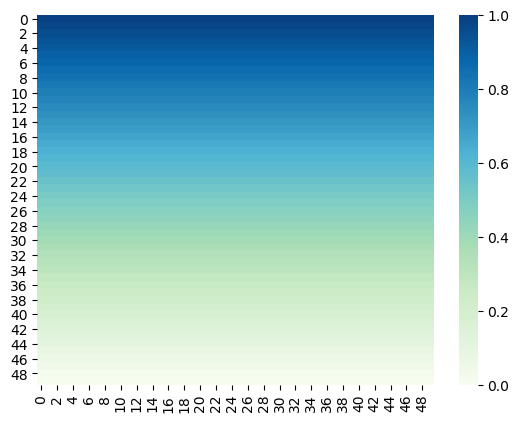

In [184]:
k=10000
maxnumber=1e-6
sns.heatmap(jacobi(k,c_ij,maxnumber)[0],cmap="GnBu")

# The Gauss-Seidel Iteration

In [230]:
yL = 1
N = 50
dy = yL/N
t=1
c_ij=np.zeros([N,N])
c_ij[0]=1



def Gauss_Seidel(k,c_ij,maxnumber):
    
    for g in range(k):
        c_old = c_ij.copy()
        c_stop=np.zeros([N,N])
        
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                if i==0 :
                    c_ij[i,j]=1
                elif i==len(c_ij[0])-1 :
                    c_ij[i,j]=0
            #lefside
                elif j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1]) 
                else:
                    c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1]) 
                    

        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])): 
                c_stop[i,j]=abs(c_old[i,j]-c_ij[i,j])           
                    
        if np.max(c_stop)<maxnumber:
            print(g)
            break
        else:
            continue
      
            
    return c_ij,g


3480


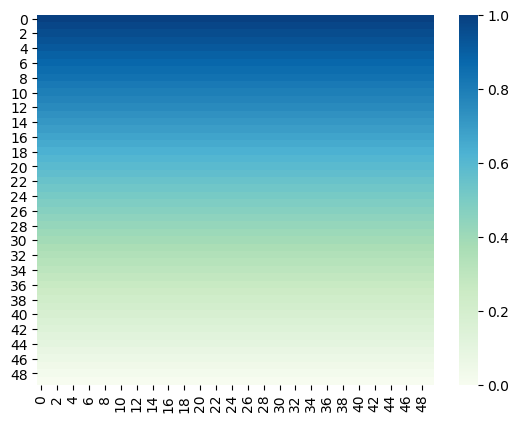

In [231]:
k=10000
maxnumber=1e-6
sns.heatmap(Gauss_Seidel(k,c_ij,maxnumber)[0],cmap="GnBu")

# Successive Over Relaxation

In [232]:
yL = 1
N = 50
dy = yL/N
t=1
c_ij=np.zeros([N,N])
c_ij[0]=1


def successive(k,c_ij,w,maxnumber):
    
    for g in range(k):
        #using one value to determine if stop the iteration
        #before
        c_old = c_ij.copy()
        c_stop=np.zeros([N,N])
        
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                    
                if i==0 :
                    c_ij[i,j]=1
                elif i==len(c_ij[0])-1 :
                    c_ij[i,j]=0
            #lefside
                elif j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1])
                else:
                    c_ij[i,j] = (w/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1])+(1-w)*c_ij[i,j]      
            
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])): 
                c_stop[i,j]=abs(c_old[i,j]-c_ij[i,j])           
                    
        if np.max(c_stop)<maxnumber:
            print(g)
            break
        else:
            continue
             
    return c_ij,g

603


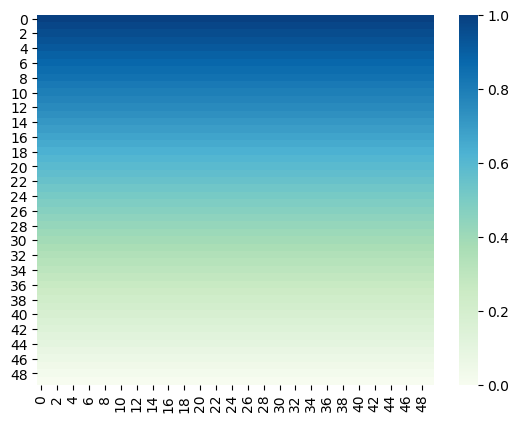

In [233]:
k=2000
w=1.8
maxnumber=1e-6
sns.heatmap(successive(k,c_ij,w,maxnumber)[0],cmap="GnBu")

# S with object

In [255]:
yL = 1
N = 50
dy = yL/N
t=1
c_ij=np.zeros([N,N])
c_ij[0]=1


def successive_object(k,c_ij,w,maxnumber,option):
    
    for g in range(k):
        c_old = c_ij.copy()
        c_stop=np.zeros([N,N])
        
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                if i==0 :
                    c_ij[i,j]=1
                elif i==len(c_ij[0])-1 :
                    c_ij[i,j]=0
            #lefside
                elif j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1])

                elif  option == 1 and (5<j<12 and 5<i<12):
                    c_ij[i,j]=0
                elif  option == 2 and ((5<j<12 and 5<i<12) or (15<j<22 and 5<i<12)):
                    c_ij[i,j]=0
                elif  option == 3 and ((5<j<12 and 5<i<12) or (15<j<22 and 5<i<12) or (25<j<32 and 5<i<12)):
                    c_ij[i,j]=0
                elif  option == 4 and ((5<j<12 and 5<i<12) or (15<j<22 and 5<i<12) or (25<j<32 and 5<i<12)or (35<j<42 and 5<i<12)):
                    c_ij[i,j]=0    
                    
                else:
                    c_ij[i,j] = (w/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1])+(1-w)*c_ij[i,j]    
                    
        #after   
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])): 
                c_stop[i,j]=abs(c_old[i,j]-c_ij[i,j])           
                    
        if np.max(c_stop)<maxnumber:
            print(g)
            break
        else:
            continue
             
    return c_ij,g

432


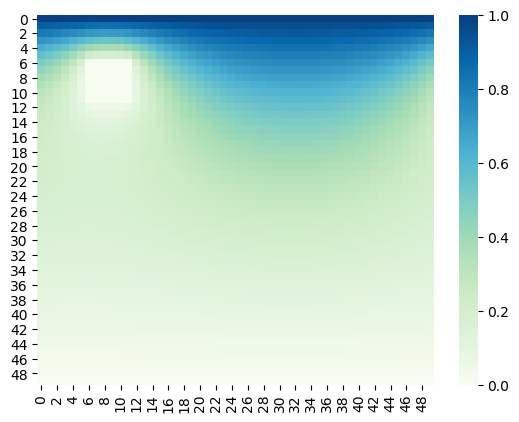

In [264]:
maxnumber=1e-6
k=10000
w=1.8
option=1
sns.heatmap(successive_object(k,c_ij,w,maxnumber,option)[0],cmap="GnBu")

438
383
332
273


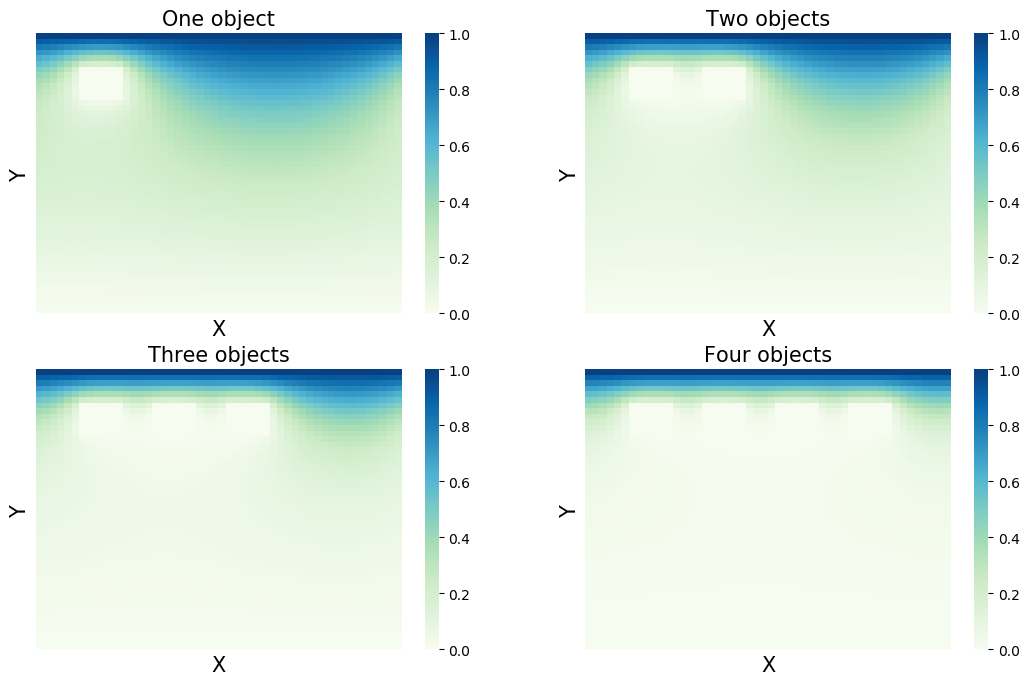

In [270]:
plt.figure(figsize=(13,8))
maxnumber=1e-6
k=10000
w=1.8
plt.subplot(2,2,1)
c_ij=np.zeros([N,N])
c_ij[0]=1
sns.heatmap(successive_object(k,c_ij,w,maxnumber,1)[0],cmap="GnBu")
plt.title('One object',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,2)
c_ij=np.zeros([N,N])
c_ij[0]=1
sns.heatmap(successive_object(k,c_ij,w,maxnumber,2)[0],cmap="GnBu")
plt.title('Two objects',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,3)
c_ij=np.zeros([N,N])
c_ij[0]=1
sns.heatmap(successive_object(k,c_ij,w,maxnumber,3)[0],cmap="GnBu")
plt.title('Three objects',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,4)
c_ij=np.zeros([N,N])
c_ij[0]=1
sns.heatmap(successive_object(k,c_ij,w,maxnumber,4)[0],cmap="GnBu")
plt.title('Four objects',size=15)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.savefig('tchange_objects.jpg',dpi=200)

# Analytical 

In [18]:
def analyticalresult(timelist,D,N):
    analyticallist=[]
    for t in timelist:
        clist=[]
        for y in np.linspace(0,1,N):
            c=0
            for i in range(1000):
                a=scipy.special.erfc((1+y+2*i)/(2*np.sqrt(D*t)))
                b=scipy.special.erfc((1-y+2*i)/(2*np.sqrt(D*t)))
                c=c+(a-b)
            clist.append(c) 
        analyticallist.append(clist) 
    return analyticallist
        
#scipy.special.erfc           

In [19]:
N=50
D=1
deltat=0.0001
timelist=[0.001+0.0001,0.01+0.0001,0.1+0.0001,1+0.0001]
analytical=analyticalresult(timelist,D,N)
list_1=np.zeros([len(analytical),N])
analytical_1=list_1-analytical


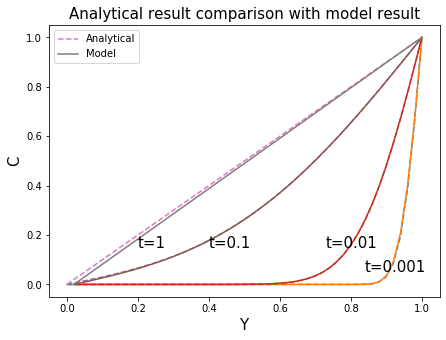

In [20]:
plt.figure(figsize=(7,5))
timelist=[0.001+0.0001,0.01+0.0001,0.1+0.0001,1+0.0001]
for i in range(len(analytical_1)):
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    p1,=plt.plot(np.linspace(0,1,N),analytical_1[i],'--')
    p2,=plt.plot(np.arange(1,0,-0.02),time_dependent(c_ij,timelist[i],deltat,D,N)[:,1])

plt.text(0.84, 0.05, 't=0.001',fontsize=15)  
plt.text(0.73, 0.15, 't=0.01',fontsize=15)  
plt.text(0.4, 0.15, 't=0.1',fontsize=15) 
plt.text(0.2, 0.15, 't=1',fontsize=15)
plt.legend([p1, p2], ["Analytical", "Model"], loc='upper left')
plt.title('Analytical result comparison with model result',size=15)
plt.xlabel('Y',size=15)
plt.ylabel('C',size=15)
plt.savefig('timedepend-analystic.jpg',dpi=200)

# Question_H

6307
3480
603


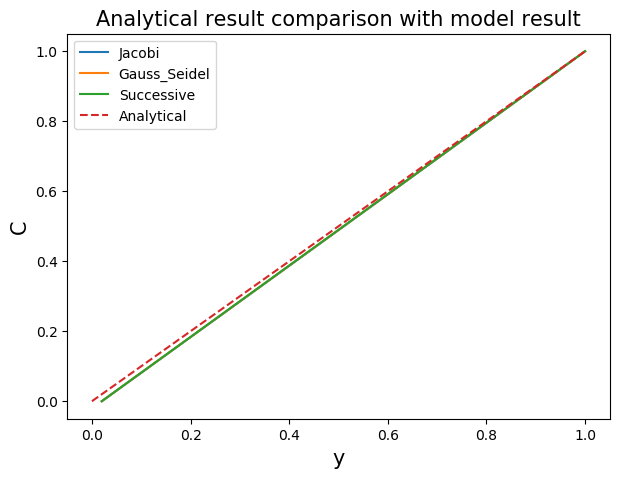

In [274]:
yL = 1
N = 50
k=10000
dy = yL/N
plt.figure(figsize=(7,5))
analyticalone=analyticalresult([1],D,N)
list_1=np.zeros([len(analyticalone),N])
analytical_2=list_1-analyticalone


c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),jacobi(k,c_ij,1e-6)[0][:,0],label='Jacobi')

c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),Gauss_Seidel(k,c_ij,1e-6)[0][:,0],label='Gauss_Seidel')

c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),successive(k,c_ij,1.8,1e-6)[0][:,0],label='Successive')
plt.plot(np.linspace(0,1,N),analytical_2[0],'--',label='Analytical')

plt.legend()
plt.xlabel('y',size=15)
plt.ylabel('C',size=15)
plt.title('Analytical result comparison with model result',size=15)
plt.savefig('timeindepend-analystic.jpg',dpi=200)


6307
3480
603


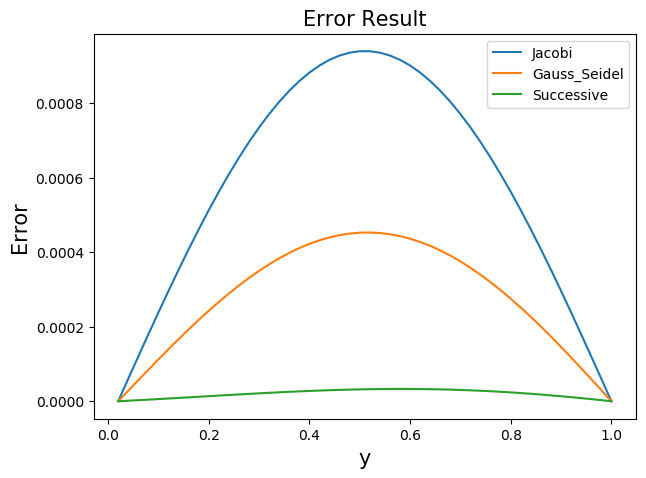

In [316]:
plt.figure(figsize=(7,5))
c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),abs(analytical_2[0][::-1]-jacobi(k,c_ij,1e-6)[0][:,0]),label='Jacobi')
c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),abs(analytical_2[0][::-1]-Gauss_Seidel(k,c_ij,1e-6)[0][:,0]),label='Gauss_Seidel')
c_ij=np.zeros([N,N])
c_ij[0]=1
plt.plot(np.arange(1,0,-dy),abs(analytical_2[0][::-1]-successive(k,c_ij,1.8,1e-6)[0][:,0]),label='Successive')
plt.legend()
plt.xlabel('y',size=15)
plt.ylabel('Error',size=15)
plt.title('Error Result',size=15)
plt.savefig('Error_of_time_independt.jpg')

# Question_I

In [237]:
maxnumberlist=[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]
length=len(maxnumberlist)
iterationlist_j=np.zeros([length])
iterationlist_G=np.zeros([length])
iterationlist_s_8=np.zeros([length])
iterationlist_s_7=np.zeros([length])
iterationlist_s_6=np.zeros([length])
iterationlist_s_9=np.zeros([length])


In [238]:
yL = 1
N = 50
dy = yL/N
t=1
k=100000
w=1.8
for index,i in enumerate(maxnumberlist):
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_j[index]=jacobi(k,c_ij,i)[1]
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_G[index]=Gauss_Seidel(k,c_ij,i)[1]
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_s_6[index]=successive(k,c_ij,1.6,i)[1]
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_s_7[index]=successive(k,c_ij,1.7,i)[1]
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_s_8[index]=successive(k,c_ij,w,i)[1]
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    iterationlist_s_9[index]=successive(k,c_ij,1.9,i)[1]
    

10788
5721
1717
1293
907
556
8547
4600
1414
1070
755
466
6307
3480
1112
848
603
376
4067
2360
809
625
452
286
1827
1240
507
403
300
197
242
235
205
180
148
107
23
22
24
25
25
28


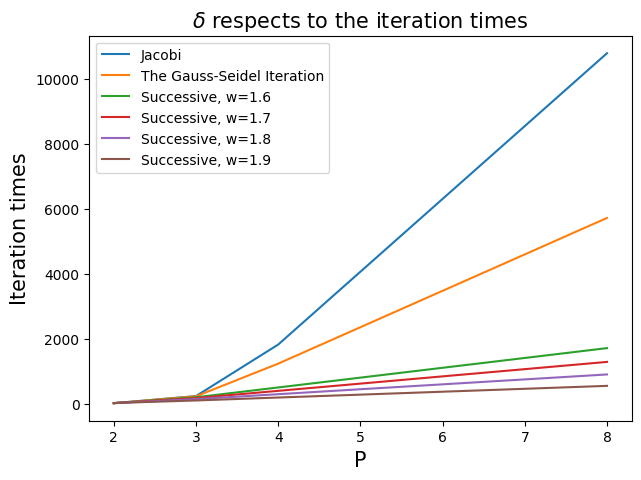

In [295]:
plt.figure(figsize=(7,5))
plt.plot([2,3,4,5,6,7,8],iterationlist_j[::-1],label='Jacobi')
plt.plot([2,3,4,5,6,7,8],iterationlist_G[::-1],label='The Gauss-Seidel Iteration')
plt.plot([2,3,4,5,6,7,8],iterationlist_s_6[::-1],label='Successive, w=1.6')
plt.plot([2,3,4,5,6,7,8],iterationlist_s_7[::-1],label='Successive, w=1.7')
plt.plot([2,3,4,5,6,7,8],iterationlist_s_8[::-1],label='Successive, w=1.8')
plt.plot([2,3,4,5,6,7,8],iterationlist_s_9[::-1],label='Successive, w=1.9')
plt.legend()
# plt.yscale('log')
plt.xlabel('P',size=15)
plt.title('$\delta$ respects to the iteration times',size=15)
plt.ylabel('Iteration times',size=15)
plt.savefig('Question_I_itera_lipsion.jpg',dpi=200)

# Question J

In [241]:
yL = 1
N = 50
dy = yL/N
t=1
k=100000
c_ij=np.zeros([N,N])
c_ij[0]=1
wlist=np.arange(1.7,2.0,0.01)


wresultlist=[]
for i in wlist:
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    wresultlist.append(successive(k,c_ij,i,1e-6)[1])

848
822
797
772
748
723
699
675
651
627
603
580
557
534
511
488
465
443
420
398
376
355
333
312
291
274
336
413
584
1121


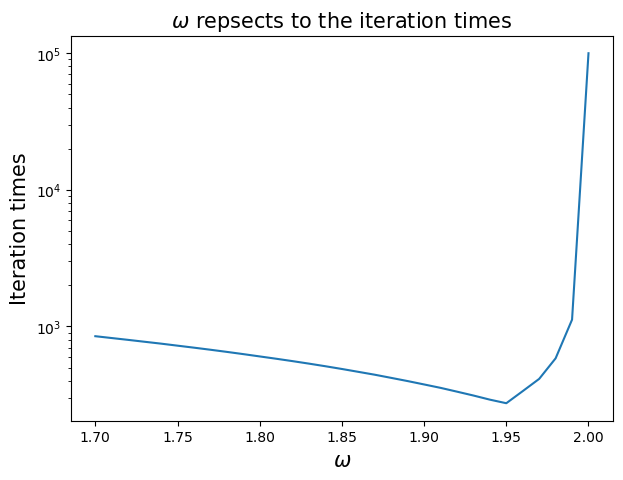

In [243]:
plt.figure(figsize=(7,5))
plt.plot(wlist,wresultlist)
plt.xlabel('$\omega$',size=15)
plt.ylabel('Iteration times',size=15)
plt.yscale('log')
plt.title('$\omega$ repsects to the iteration times',size=15)
plt.savefig('wwiththe_iteration.jpg',dpi=200)

In [272]:
yL = 1
nlist=np.arange(20,70,1)
t=1
k=100000
wlist=np.arange(1.8,2,0.01)
minvalue=[]
minwlist=[]
for N in nlist:
    wresultlist_n=[]
    for i in wlist:
        c_ij=np.zeros([N,N])
        c_ij[0]=1
        wresultlist_n.append(successive(k,c_ij,i,1e-6)[1])
    minvalue.append(min(wresultlist_n)) 
    minwlist.append(wlist[np.argmin(wresultlist_n)])   

137
133
130
126
122
119
115
111
110
112
123
133
151
169
195
227
282
370
528
939
148
144
140
136
131
127
123
120
116
116
122
136
153
173
196
236
288
373
537
968
160
155
150
146
141
137
132
128
123
122
124
138
148
169
201
230
289
374
534
975
171
166
161
156
151
146
141
136
132
127
128
137
152
174
196
237
284
371
547
1009
183
178
172
166
161
156
150
145
140
135
133
136
157
176
203
233
291
380
548
1010
195
189
183
177
171
166
160
154
149
143
138
142
156
174
202
237
287
380
549
1018
208
201
195
188
182
176
169
163
157
151
145
146
154
174
201
240
294
386
547
1036
221
214
207
200
193
186
179
173
166
160
153
150
154
180
204
234
293
385
558
1037
234
227
219
212
204
197
189
182
175
168
161
155
160
183
207
241
295
390
561
1050
248
240
232
223
215
208
200
192
185
177
170
162
164
180
204
245
302
383
556
1061
262
253
244
236
227
219
210
202
194
186
178
170
167
178
203
246
304
393
548
1069
276
267
257
248
239
230
221
212
204
195
187
178
172
178
208
242
297
387
563
1075
291
281
271
261
251
242
232
223

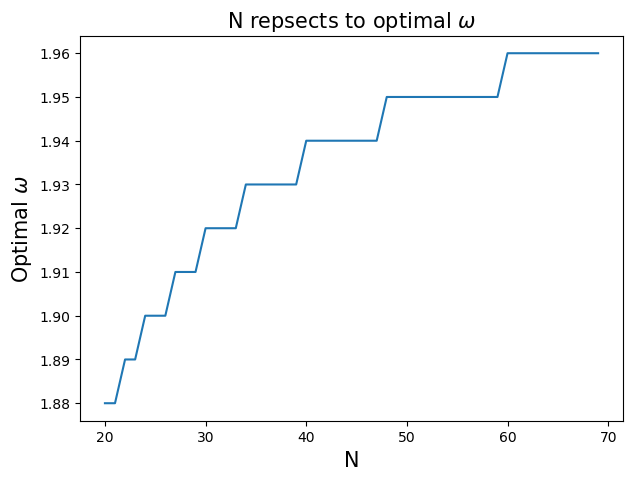

In [273]:
plt.figure(figsize=(7,5))
plt.plot(nlist,minwlist)
plt.xlabel('N',size=15)
plt.ylabel("Optimal $\omega$",size=15)
plt.title('N repsects to optimal $\omega$',size=15)
plt.savefig('N-optimal_w_question_J.jpg',dpi=200)

# Question K

In [265]:
yL = 1
N = 50
dy = yL/N
t=1
k=100000
wlist=np.arange(1.7,2.0,0.01)

wresultlist_object_1=[]
wresultlist_object_2=[]
wresultlist_object_3=[]
wresultlist_object_4=[]
for i in wlist:
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    wresultlist_object_1.append(successive_object(k,c_ij,i,1e-6,1)[1]) 
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    wresultlist_object_2.append(successive_object(k,c_ij,i,1e-6,2)[1])
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    wresultlist_object_3.append(successive_object(k,c_ij,i,1e-6,3)[1])
    c_ij=np.zeros([N,N])
    c_ij[0]=1
    wresultlist_object_4.append(successive_object(k,c_ij,i,1e-6,4)[1])

618
536
459
370
599
520
446
360
581
504
433
350
562
489
420
340
544
473
407
330
526
458
394
320
508
443
382
311
490
428
369
301
473
413
357
292
455
398
345
282
438
383
332
273
420
368
320
263
403
354
308
254
386
339
296
245
369
325
284
235
352
311
272
226
336
296
260
217
319
282
249
208
303
268
237
199
287
255
226
190
271
241
214
181
255
228
203
172
239
214
192
169
224
207
196
193
228
218
223
217
254
253
257
250
302
311
305
310
389
381
389
391
559
545
551
553
1088
1033
979
975
61505
35189


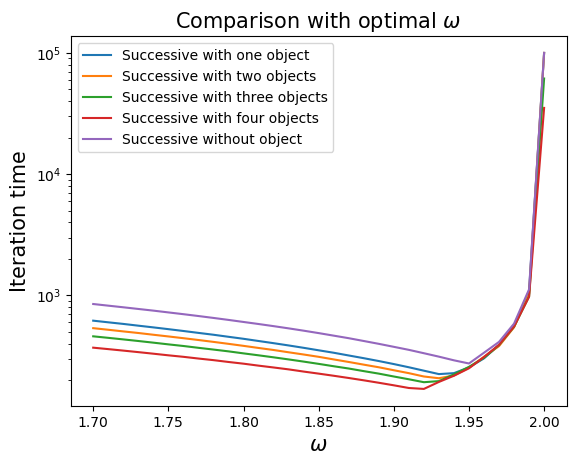

In [271]:
plt.plot(wlist,wresultlist_object_1,label='Successive with one object')
plt.plot(wlist,wresultlist_object_2,label='Successive with two objects')
plt.plot(wlist,wresultlist_object_3,label='Successive with three objects')
plt.plot(wlist,wresultlist_object_4,label='Successive with four objects')
plt.plot(wlist,wresultlist,label='Successive without object')
plt.legend()
plt.xlabel('$\omega$',size=15)
plt.yscale('log')
plt.ylabel('Iteration time',size=15)
plt.title('Comparison with optimal $\omega$ ',size=15)
plt.savefig('object_without_comparison.jpg',dpi=200)

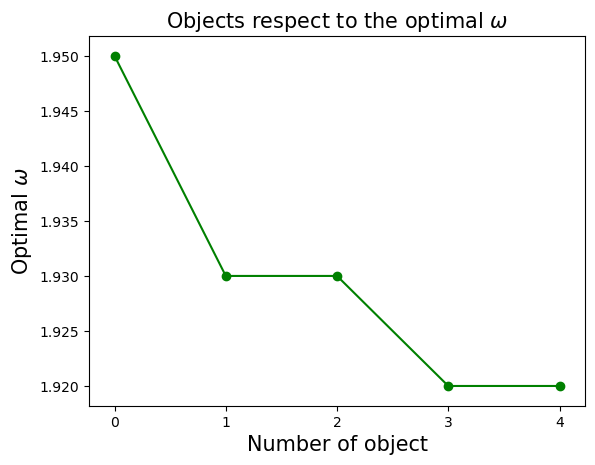

In [313]:
wlist=np.arange(1.7,2.0,0.01)
plt.plot(h,[wlist[np.argmin(wresultlist)],wlist[np.argmin(wresultlist_object_1)],wlist[np.argmin(wresultlist_object_2)],wlist[np.argmin(wresultlist_object_3)],wlist[np.argmin(wresultlist_object_4)]],color='green')
plt.scatter(h,[wlist[np.argmin(wresultlist)],wlist[np.argmin(wresultlist_object_1)],wlist[np.argmin(wresultlist_object_2)],wlist[np.argmin(wresultlist_object_3)],wlist[np.argmin(wresultlist_object_4)]],color='green')
plt.xticks([0,1,2,3,4])
plt.xlabel('Number of object',size=15)
plt.ylabel('Optimal $\omega$',size=15)
plt.title('Objects respect to the optimal $\omega$',size=15)
plt.savefig('objects_with_omg.jpg', dpi=200)

# plt.plot(h,[min(wresultlist),min(wresultlist_object_1),min(wresultlist_object_2),min(wresultlist_object_3),min(wresultlist_object_4)])